## Veränderungen der Lebenszufriedenheit
Gruppe: Elena Avkova, Yasemin Gökuguz
### 1.1 Titel: 
- Self-reported life satisfaction, 2011 to 2023 
### 1.2 Fragestellung:
- Welches Land hat die höchste/niedriegste Lebenszufriedenheit? Was sind die Gründe dafür? 
- Besteht ein Zusammenhang zwischen der Lebenszufriedenheit und der Lebenserwartung in einem Land? Was könnten Gründe dafür sein?
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org





### 1.4 Daten beschaffen und laden

In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv('happiness-cantril-ladder.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Cantril ladder score']) 
df.head()

,Gebiet,Code,Jahr,Cantril ladder score
0,Afghanistan,AFG,2011,4.25835
1,Afghanistan,AFG,2014,3.57500
2,Afghanistan,AFG,2015,3.36000
3,Afghanistan,AFG,2016,3.79400
4,Afghanistan,AFG,2017,3.63150


## 2. Daten vorbereiten 
Der Datensatz happiness-cantril-ladder.csv enthält folgende Spalten und Datentypen:
- Gebiet (String)
- Code (String: kategorisch)
- Jahr (numerisch)
- Cantril ladder score (numerisch)

Die Daten sind im Long-Format organisiert.
Für die Analyse werden die Daten pivotiert, um mehrere Jahre und Regionen gleichzeitig zu vergleichen. 


In [35]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Cantril ladder score')
df_pivot.head()

Jahr,2011,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Gebiet,,,,,,,,,,,
Afghanistan,4.258350,3.575000,3.360000,3.794000,3.631500,3.203300,2.566900,2.522900,2.403800,1.859000,1.721000
Africa,4.453107,4.474157,4.395968,4.457408,4.445971,4.511974,4.459995,4.551006,4.517288,4.426524,4.384616
Albania,5.133704,4.959000,4.655000,4.644000,4.586000,4.718600,4.882700,5.117400,5.198800,5.277300,5.304200
Algeria,5.367827,5.605000,6.355000,5.872000,5.294600,5.211300,5.005100,4.887100,5.122300,5.329100,5.363500
Angola,4.178380,4.033000,3.866000,3.795000,3.794800,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
Über die einzelnen Spalten lässt sich Folgendes aussagen: 

- Diskrete Variabeln: Gebiet, Code, Jahr 
- Kontinuierliche Variabel: Cantril ladder score

- Die Spalte Gebiete enthält 178 verschiedene Gebiete. 
- Die Spalte Codes enthält 169 verschiedene Codes. 
- Es sind Daten zwischen 2011 und 2023 vorhanden. 2014 gab es am meisten Daten und 2022 am wenigsten. 
- Es gibt 141 Länder, die 11 Datenpunkte aufweisen und 37 Länder, die weniger als 11 Datenpunkte aufweisen.
- Es gibt somit keine Länder, die jedes Jahr einen Datenpunkt aufweisen. 
- Das Histogramm der Daten weist auf eine Normalverteilung hin, der Median und Mittelwert liegen nahe beieinander. (Mittelwert: 5.46, Median: 5.43)
- Der Boxplot ist symmetrisch und weist auch auf eine Normalverteilung der Datenreihe hin. Der Median liegt in der Mitte der Box und der Abstand zwischen dem 1. Quartil und dem 3. Quartil ist auf beiden Seiten der Box etwa gleich.
- Der Cantril Ladder Score streut zwischen Werten von 1.7 und 7.9. 


In [36]:
import pandas as pd
df = pd.read_csv('happiness-cantril-ladder.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Cantril ladder score']) 
df

,Gebiet,Code,Jahr,Cantril ladder score
0,Afghanistan,AFG,2011,4.25835
1,Afghanistan,AFG,2014,3.57500
2,Afghanistan,AFG,2015,3.36000
3,Afghanistan,AFG,2016,3.79400
4,Afghanistan,AFG,2017,3.63150
...,...,...,...,...
1782,Zimbabwe,ZWE,2019,3.29920
1783,Zimbabwe,ZWE,2020,3.14480
1784,Zimbabwe,ZWE,2021,2.99510
1785,Zimbabwe,ZWE,2022,3.20350


In [37]:
df.dtypes

Gebiet                   object
Code                     object
Jahr                      int64
Cantril ladder score    float64
dtype: object

## 3.1 Analyse Gebiete ##

In [38]:
print('Anzahl verschiedene Gebiete: ', len(df['Gebiet'].unique()))


Anzahl verschiedene Gebiete:  178


In [39]:
df['Gebiet'].value_counts()

Gebiet
Afghanistan    11
Niger          11
Montenegro     11
Morocco        11
Myanmar        11
               ..
Djibouti        2
Puerto Rico     2
Cuba            1
Guyana          1
Oman            1
Name: count, Length: 178, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

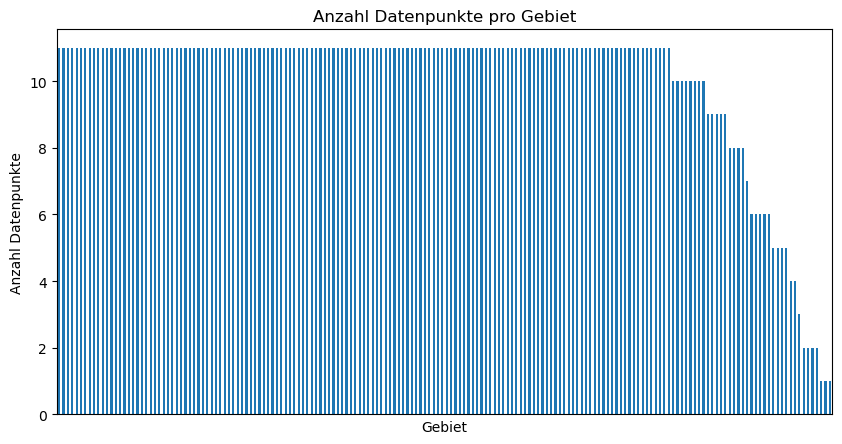

In [40]:
df['Gebiet'].value_counts().plot(kind='bar', xticks=[],ylabel='Anzahl Datenpunkte',figsize= (10,5), title='Anzahl Datenpunkte pro Gebiet')

## 3.2 Analyse Codes ##

In [41]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  169


In [42]:
df['Code'].value_counts()

Code
AFG    11
PHL    11
MNE    11
MAR    11
MMR    11
       ..
PRI     2
SUR     2
CUB     1
OMN     1
GUY     1
Name: count, Length: 168, dtype: int64

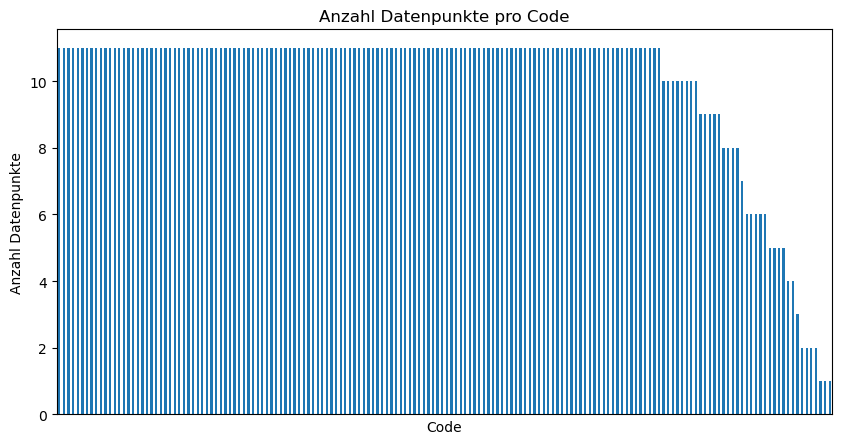

In [43]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte',figsize= (10,5), title='Anzahl Datenpunkte pro Code');

#### Darstellung der Länder die weniger als 11 Datenpunkte haben

In [44]:
value_counts = df['Gebiet'].value_counts()
low_data_countries = value_counts[value_counts < 11]
print(low_data_countries)

Gebiet
Azerbaijan                      10
Laos                            10
Yemen                           10
Kuwait                          10
Libya                           10
Mozambique                      10
Gabon                           10
Namibia                         10
Comoros                          9
Democratic Republic of Congo     9
Belarus                          9
Turkmenistan                     9
Rwanda                           9
Lesotho                          8
Northern Cyprus                  8
Haiti                            8
Burundi                          8
Trinidad and Tobago              7
Central African Republic         6
Eswatini                         6
Syria                            6
Gambia                           6
Qatar                            6
Bhutan                           5
Angola                           5
Sudan                            5
South Sudan                      5
Belize                           4
Somalia      

In [45]:
value_counts = df['Gebiet'].value_counts()
low_data_countries = value_counts[value_counts < 11]
count_of_low_data_countries = len(low_data_countries)
print(f"Anzahl Länder, die weniger als 11 Datenpunkte haben: {count_of_low_data_countries}")

Anzahl Länder, die weniger als 11 Datenpunkte haben: 37


In [46]:
value_counts = df['Gebiet'].value_counts()
exactly_11_data_countries = value_counts[value_counts == 11]
count_of_exactly_11_data_countries = len(exactly_11_data_countries)
print(f"Anzahl Länder, die genau 11 Datenpunkte haben: {count_of_exactly_11_data_countries}")

Anzahl Länder, die genau 11 Datenpunkte haben: 141


## 3.3 Analyse Jahr ##

In [47]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  11


#### Anzahl Datenpunkte pro Jahr ####

In [48]:
df['Jahr'].value_counts().sort_index()

Jahr
2011    167
2014    169
2015    168
2016    166
2017    167
2018    167
2019    164
2020    160
2021    157
2022    148
2023    154
Name: count, dtype: int64

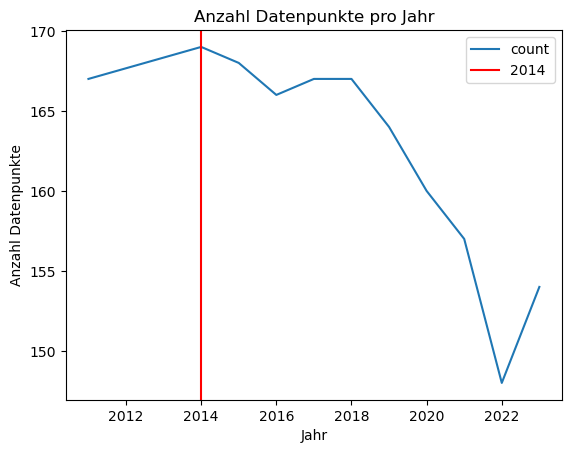

In [49]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2014, color='red',label='2014')
g.legend()  

#### Statistische Kennzahlen des Cantril Ladder Scores

In [50]:
print('Mittelwert:',df['Cantril ladder score'].mean())
print('Median:',df['Cantril ladder score'].median())
print('Standardabweichung:',df['Cantril ladder score'].std())
print('5% Perzentil:',df['Cantril ladder score'].quantile(0.05))
print('99.9% Perzentil:',df['Cantril ladder score'].quantile(0.999))
print('Max:',df['Cantril ladder score'].max())
print('Min:',df['Cantril ladder score'].min())

Mittelwert: 5.455646661275882
Median: 5.4318
Standardabweichung: 1.1146867665403009
5% Perzentil: 3.59783
99.9% Perzentil: 7.825515400000003
Max: 7.85574
Min: 1.721


In [51]:
df.describe()

,Jahr,Cantril ladder score
count,1787.000000,1787.000000
mean,2017.702854,5.455647
std,3.470175,1.114687
min,2011.000000,1.721000
25%,2015.000000,4.594467
50%,2018.000000,5.431800
75%,2021.000000,6.298900
max,2023.000000,7.855740


In [52]:
df.sort_values(by='Cantril ladder score', ascending=False).head(10)

,Gebiet,Code,Jahr,Cantril ladder score
418,Denmark,DNK,2011,7.85574
521,Finland,FIN,2020,7.84210
522,Finland,FIN,2021,7.82100
520,Finland,FIN,2019,7.80870
523,Finland,FIN,2022,7.80420
519,Finland,FIN,2018,7.76890
524,Finland,FIN,2023,7.74070
424,Denmark,DNK,2019,7.64560
426,Denmark,DNK,2021,7.63620
518,Finland,FIN,2017,7.63210


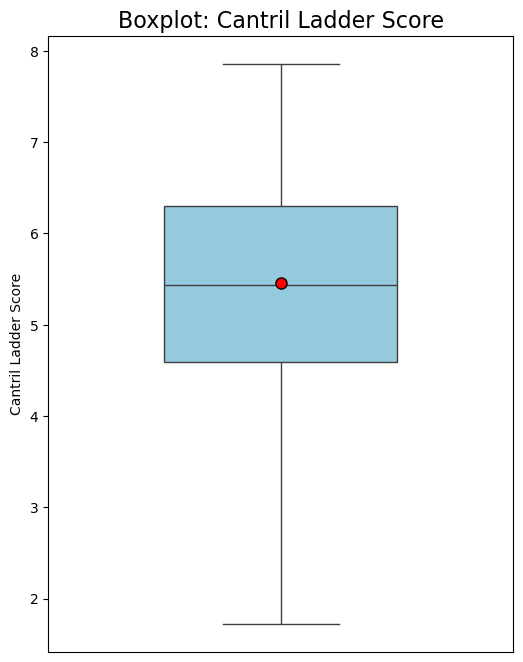

In [53]:
score_data = df['Cantril ladder score'].dropna()
plt.figure(figsize=(6, 8))
sns.boxplot(data=[score_data],width=0.5,color="skyblue",showmeans=True,meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": 8},whis=[0, 100] )

plt.title("Boxplot: Cantril Ladder Score", fontsize=16)
plt.ylabel("Cantril Ladder Score")
plt.xticks([]) 

plt.show()

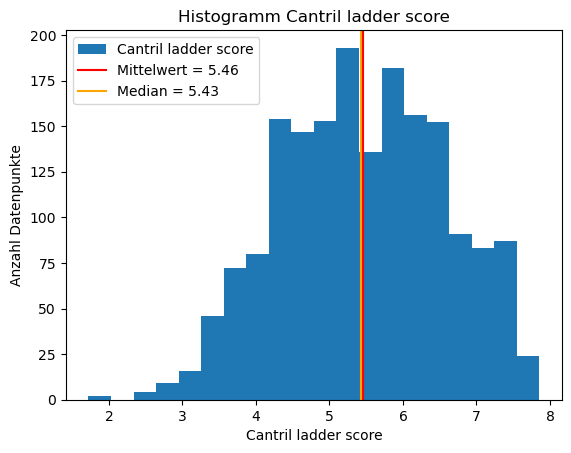

In [54]:

g = df['Cantril ladder score'].plot(kind='hist', bins=20, title='Histogramm Cantril ladder score', 
                           xlabel='Cantril ladder score', ylabel='Anzahl Datenpunkte')
mean = df['Cantril ladder score'].mean()
g.axvline(x=df['Cantril ladder score'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  


median = df['Cantril ladder score'].median()
g.axvline(x=df['Cantril ladder score'].median(), color='orange',label=  f'Median = {median:.2f}')  

g.legend()


## 4. Analyse ##
#### Für die Analyse werden verschiedene Berechnungen und Grafiken erstellt, um daraus Beobachtungen zu erzielen.

In [55]:
diffs = df_pivot[2023]-df_pivot[2014]   
diffs = diffs.sort_values().dropna()  
diffs

Gebiet
Lebanon         -2.1325
Afghanistan     -1.8540
Lesotho         -1.7118
Zambia          -1.6266
Eswatini        -1.3650
                  ...  
Serbia           1.2878
Romania          1.3672
Guinea           1.3673
Togo             1.3751
Cote d'Ivoire    1.4251
Length: 152, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen des Cantril ladder score 2011-2023'}, ylabel='Gebiet'>

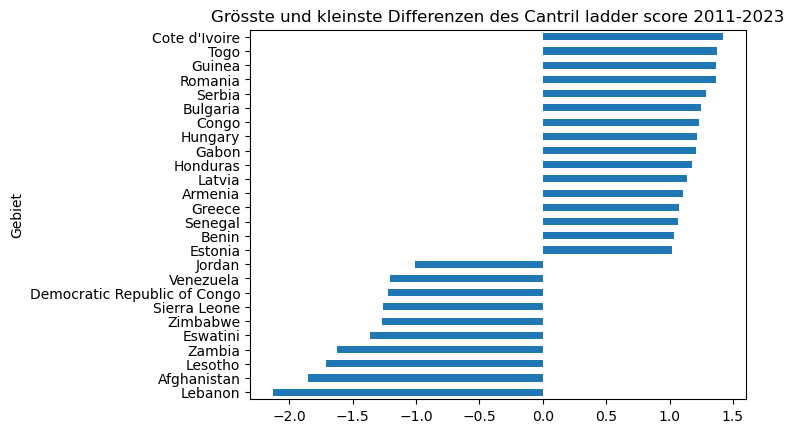

In [56]:
diff_sel = (diffs < -1) | (diffs > 1) 
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen des Cantril ladder score 2011-2023')

In [57]:
Gebiets_liste = diffs[diff_sel].index.tolist()  
print(Gebiets_liste)

['Lebanon', 'Afghanistan', 'Lesotho', 'Zambia', 'Eswatini', 'Zimbabwe', 'Sierra Leone', 'Democratic Republic of Congo', 'Venezuela', 'Jordan', 'Estonia', 'Benin', 'Senegal', 'Greece', 'Armenia', 'Latvia', 'Honduras', 'Gabon', 'Hungary', 'Congo', 'Bulgaria', 'Serbia', 'Romania', 'Guinea', 'Togo', "Cote d'Ivoire"]


In [58]:
max_score = df['Cantril ladder score'].max()
min_score = df['Cantril ladder score'].min()
max_score_gebiet = df[df['Cantril ladder score'] == max_score]['Gebiet']
min_score_gebiet = df[df['Cantril ladder score'] == min_score]['Gebiet']


print(f"Der höchste Cantril ladder score ist {max_score} und kommt aus den Gebieten: {max_score_gebiet.tolist()}")
print(f"Der niedrigste Cantril ladder score ist {min_score} und kommt aus den Gebieten: {min_score_gebiet.tolist()}")

Der höchste Cantril ladder score ist 7.85574 und kommt aus den Gebieten: ['Denmark']
Der niedrigste Cantril ladder score ist 1.721 und kommt aus den Gebieten: ['Afghanistan']


In [59]:
top_5_scores = df.nlargest(5, 'Cantril ladder score')
bottom_5_scores = df.nsmallest(5, 'Cantril ladder score')

top_5_gebiete = top_5_scores[['Gebiet', 'Cantril ladder score']]
bottom_5_gebiete = bottom_5_scores[['Gebiet', 'Cantril ladder score']]

print("Die 5 höchsten Cantril ladder scores und die zugehörigen Gebiete:")
for _, row in top_5_gebiete.iterrows():
    print(f"{row['Gebiet']}: {row['Cantril ladder score']}")

print("\nDie 5 niedrigsten Cantril ladder scores und die zugehörigen Gebiete:")
for _, row in bottom_5_gebiete.iterrows():
    print(f"{row['Gebiet']}: {row['Cantril ladder score']}")

Die 5 höchsten Cantril ladder scores und die zugehörigen Gebiete:
Denmark: 7.85574
Finland: 7.8421
Finland: 7.821
Finland: 7.8087
Finland: 7.8042

Die 5 niedrigsten Cantril ladder scores und die zugehörigen Gebiete:
Afghanistan: 1.721
Afghanistan: 1.859
Lebanon: 2.3922
Afghanistan: 2.4038
Afghanistan: 2.5229


In [60]:
df_clean = df.dropna(subset=['Gebiet', 'Cantril ladder score'])

top_5_scores_all_years = df_clean.groupby('Gebiet')['Cantril ladder score'].max().nlargest(5)
bottom_5_scores_all_years = df_clean.groupby('Gebiet')['Cantril ladder score'].min().nsmallest(5)

print("Die 5 Länder mit den höchsten Cantril ladder scores über alle Jahre:")
for country, score in top_5_scores_all_years.items():
    print(f"{country}: {score}")

print("\nDie 5 Länder mit den niedrigsten Cantril ladder scores über alle Jahre:")
for country, score in bottom_5_scores_all_years.items():
    print(f"{country}: {score}")

Die 5 Länder mit den höchsten Cantril ladder scores über alle Jahre:
Denmark: 7.85574
Finland: 7.8421
Norway: 7.5937
Switzerland: 7.587
Iceland: 7.561

Die 5 Länder mit den niedrigsten Cantril ladder scores über alle Jahre:
Afghanistan: 1.721
Lebanon: 2.3922
Central African Republic: 2.693
South Sudan: 2.8166
Togo: 2.839


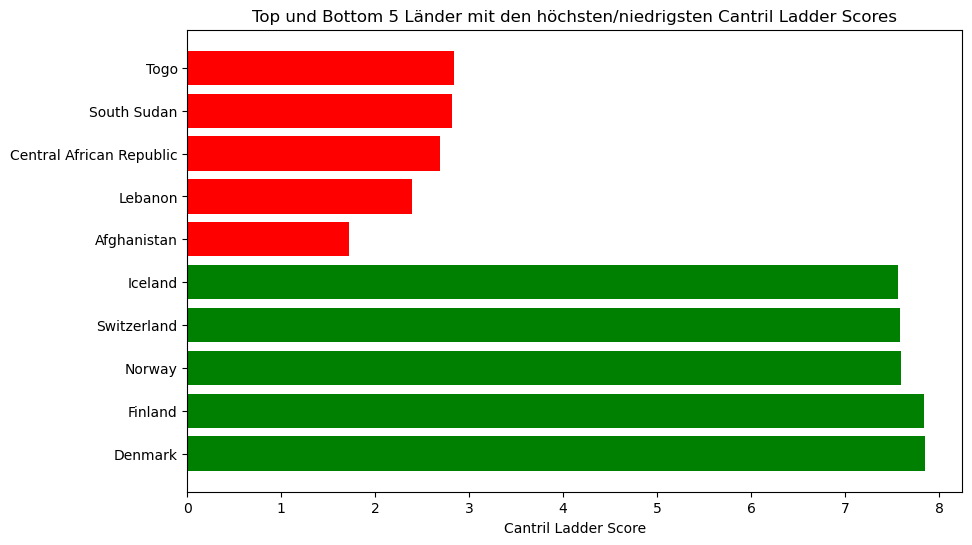

In [61]:
top_5 = {
    "Denmark": 7.85574,
    "Finland": 7.8421,
    "Norway": 7.5937,
    "Switzerland": 7.587,
    "Iceland": 7.561
}

bottom_5 = {
    "Afghanistan": 1.721,
    "Lebanon": 2.3922,
    "Central African Republic": 2.693,
    "South Sudan": 2.8166,
    "Togo": 2.839
}

countries = list(top_5.keys()) + list(bottom_5.keys())
scores = list(top_5.values()) + list(bottom_5.values())

plt.figure(figsize=(10, 6))
plt.barh(countries, scores, color=['green']*5 + ['red']*5)
plt.xlabel('Cantril Ladder Score')
plt.title('Top und Bottom 5 Länder mit den höchsten/niedrigsten Cantril Ladder Scores')
plt.show()

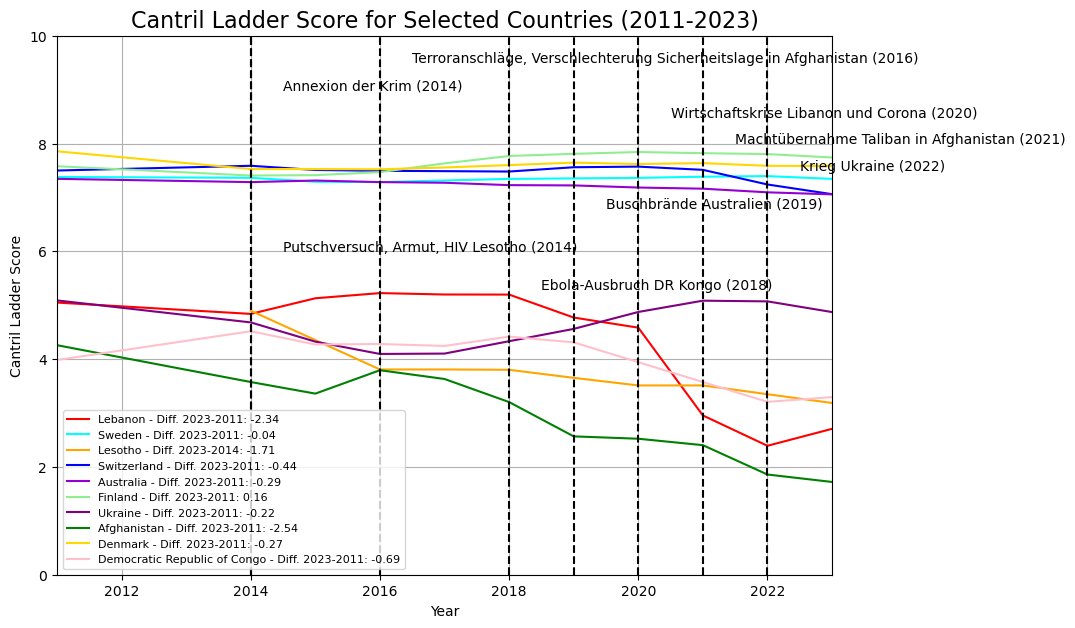

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('happiness-cantril-ladder.csv', skiprows=1,
                 names=['Gebiet', 'Code', 'Jahr', 'Cantril Ladder Score'])

df_filtered = df[(df['Jahr'] >= 2011) & (df['Jahr'] <= 2023)]

selected_countries = list({
    'Switzerland', 'Sweden', 'Finland', 'Denmark', 'Australia', 
    'Afghanistan', 'Lebanon', 'Lesotho', 
    'Democratic Republic of Congo', 'Ukraine'
})

color_dict = {
    'Switzerland': 'blue',
    'Sweden': 'cyan',
    'Finland': 'lightgreen',
    'Denmark': 'gold',
    'Australia': 'darkviolet',
    'Afghanistan': 'green',
    'Lebanon': 'red',
    'Lesotho': 'orange',
    'Democratic Republic of Congo': 'pink',
    'Ukraine': 'purple'}

plt.figure(figsize=(10, 7))

for gebiet in selected_countries:
    if gebiet in df_filtered['Gebiet'].values:
        region_data = df_filtered[df_filtered['Gebiet'] == gebiet]
        
        if (df_filtered[(df_filtered['Gebiet'] == gebiet) & (df_filtered['Jahr'] == 2023)].shape[0] > 0):
            first_year = region_data['Jahr'].min()
            diff = df_filtered[(df_filtered['Gebiet'] == gebiet) & (df_filtered['Jahr'] == 2023)]['Cantril Ladder Score'].values[0] - \
                   df_filtered[(df_filtered['Gebiet'] == gebiet) & (df_filtered['Jahr'] == first_year)]['Cantril Ladder Score'].values[0]
            
            plt.plot(region_data['Jahr'], region_data['Cantril Ladder Score'],
                     label=f'{gebiet} - Diff. 2023-{first_year}: {diff:.2f}',
                     color=color_dict.get(gebiet, 'gray'))


plt.axvline(x=2014, color='black', linestyle='--')
plt.text(2014.5, 9, 'Annexion der Krim (2014)', fontsize=10, color='black')

plt.axvline(x=2014, color='black', linestyle='--')
plt.text(2014.5, 6, 'Putschversuch, Armut, HIV Lesotho (2014)', fontsize=10, color='black')

plt.axvline(x=2016, color='black', linestyle='--')
plt.text(2016.5, 9.5, 'Terroranschläge, Verschlechterung Sicherheitslage in Afghanistan (2016)', fontsize=10, color='black')

plt.axvline(x=2018, color='black', linestyle='--')
plt.text(2018.5, 5.3, 'Ebola-Ausbruch DR Kongo (2018)', fontsize=10, color='black')

plt.axvline(x=2019, color='black', linestyle='--')
plt.text(2019.5, 6.8, 'Buschbrände Australien (2019)', fontsize=10, color='black')

plt.axvline(x=2020, color='black', linestyle='--')
plt.text(2020.5, 8.5, 'Wirtschaftskrise Libanon und Corona (2020)', fontsize=10, color='black')

plt.axvline(x=2021, color='black', linestyle='--')
plt.text(2021.5, 8, 'Machtübernahme Taliban in Afghanistan (2021)', fontsize=10, color='black')

plt.axvline(x=2022, color='black', linestyle='--')
plt.text(2022.5, 7.5, 'Krieg Ukraine (2022)', fontsize=10, color='black')

plt.title('Cantril Ladder Score for Selected Countries (2011-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Cantril Ladder Score')
plt.legend(loc='best', fontsize=8)
plt.xlim([2011, 2023])  
plt.ylim([0, 10])  
plt.grid(True)
plt.show()

### Beobachtungen
- Der höchste Cantril Ladder Score besitzt Dänemark mit 7.86. Der niedrigste Wert weist Afghanistan auf mit 1.72.
- Die 5 Länder mit den höchsten Cantril ladder scores über alle Jahre sind: 
Denmark: 7.85574,
Finland: 7.8421,
Norway: 7.5937,
Switzerland: 7.587,
Iceland: 7.561,
- Die 5 Länder mit den niedrigsten Cantril ladder scores über alle Jahre sind: 
Afghanistan: 1.721,
Lebanon: 2.3922,
Central African Republic: 2.693,
South Sudan: 2.8166,
Togo: 2.839,

- Die drei Länder, bei denen der Cantril Ladder Score über die Jahre 2011-2023 am meisten abgenommen hat sind : Afghanistan, Libanon und Lesotho.
- Ausserdem weist die Ukraine und die Demokratische Republik Kongo hohe Sprünge auf.


### Interpretation
#### Für die Interpretation werden wir uns auf folgenden Ländern einschränken: Afghanistan, Libanon, Lesotho, Ukraine, Demokratische Republik Kongo, Finnland, Schweden, Dänemark, Australien und die Schweiz. Dabei wird immer zwischen Länder mit niedriger und Länder mit hoher Lebenszufriedenheit unterschieden.
#### Länder mit niedriger Lebensufriedenheit: 

##### **Afghanistan**

Die Sicherheitslage im Jahr 2014 war in Afghanistan kontinuierlich angespannt. Obwohl Internationalen Sicherheitsbeistandstruppe bis Ende 2015 im Land bleiben sollten, die Zahl der verletzen Zivilperson stieg immens an. Die Taliban tragen die Schuld für mehr als 70% der Opfer. Leider blieben alle Fälle unerforscht und viele Familien wussten nicht wie die Familienmitglieder*in getötet oder verletzt wurde. Somit haben sie auch keine Entschädigung bekommen. Weitere Opfer haben sich beim Bauen von Sprengkörper verletzt. Frauen und Mädchen waren Ziel der Gewalt.
Die Unabhängige afghanische Menschenrechtskommission hat über 4000 Fälle verzeichnet. Meistens war Vergewaltigung innerhalb der Familie, und da Familienmitglieder während dem Gerichtsprozess im Saal waren, konnten die Frauen und Mädchen keine Vorwürfe machen. Häuslicher Gewalt und Zwangsheirat waren auch ein Thema.
Die Menschen hatten kein Recht auf freie Meinungsäusserung. Deshalb gab es Anstieg bei der Zahl von 
Misshandlungen, Bedrohungen, Inhaftierungen oder Tötungen von Journalisten.
https://www.amnesty.de/jahresbericht/2019/afghanistan

Im Jahr 2019 die Verstossungen gegen die Menschenrechte waren der Grund für Auseinandersetzungen, die dazu geführt haben, dass noch mehr Zivilisten in Gefahr standen. Sogar der Internationale Strafgerichtshof wollte die Situation nicht untersuchen. Die Menschenrechtsverteidigerinnen durften keine Meinung äussern, und falls sie versucht haben, wurden sie festgenommen, bedroht oder getötet. Im Jahr 2018 gab es ein neues Gesetz, dass sexualisierte Missbrauch von jungen männlichen Personen durch erwachsenen Männer verbietet. Leider die Realität im Jahr 2019 war anders und das Gesetz existierte nur auf Papier. 
Die Bevölkerung lebte in Armut, vor allem auf Grund von fehlenden Arbeitsstellen. Die Kinder wurden gezwungen zu arbeiten, da sonst die erwachsenen Mitglieder*innen nicht genug verdienten.
https://www.amnesty.de/jahresbericht/2019/afghanistan

Im Jahr 2023 nach der Machtübernahme der Taliban war die Situation für Frauen und Mädchen unerträglich. Sie düften keine Freizeitaktivitäten unternehmen, wie einen Nationalpark besuchen oder ins Fitness gehen. Die Schönheitssalons waren geschlossen. Alle die im Ausland studieren wollten, wurden am Flughafen aufgehalten und die weitere Reise war verboten. Grund für diese Einschränkungen war, dass die Frauen sich nicht an die Trageweise des Hidschabs hielten. 
https://www.fluechtlingshilfe.ch/publikationen/news-und-stories/afghanistan-neuste-entwicklungen



##### **Libanon**

In Libanon gab es Demonstrationen aufgrund der Korruption und die politische Elite im Land. Im Jahr 2020 war die Wirtschaftskrise, wo auch die Arbeitslosigkeit kontinuierlich gestiegen ist. Obwohl die Hälfte der Bevölkerung in Armut lebte, stieg die Inflation auf 133,5 %.
Am 4. August 2020 passierte das Unglück – Explosion im Hafengebiet von Beirut aufgrund Tonnen Ammoniumnitrat, die jahrelang im Hafen gelagert wurden. Mehr als 200 Personen wurden getötet und mehr als 6000 verletzt. Mehr als 300'000 Einwohner*innen blieben obdachlos. Später ist rausgekommen, dass die Regierung die ganze Zeit über die Tonnen Ammoniumnitrat vorgewarnt war, aber nichts dagegen unternehmen hat. 
Zur gleichen Zeit war auch Corona aktuell und die Zahl der Erkrankten stieg so viel an, dass es keinen Platz in den Spitälern gab. 
Die Lage war verschlimmert, wenn im Jahr 2019 und 2020 willkürliche Inhaftierungen an Zivilisten durchgeführt wurden. Dabei wurden die Augen der Inhaftierten verbunden und Folter sowie andere Arten von Misshandlungen angewendet.
Die Journalisten, ähnlich wie in Afghanistan durften persönlich keine Seite einnehmen. Wenn sie die Demonstrationen unterstützt haben, wurden sie verhört und gestraft. Nicht nur Journalisten, sondern auch Zivilisten, die auf den sozialen Netzwerken ihre Meinung äussern und diese gegen die Regierung ist, wurden auch bestraft. 
https://www.amnesty.de/informieren/amnesty-report/libanon-2020

«Nach Angaben der Weltbank zählte die Wirtschaftskrise im Libanon zu den zehn schwersten weltweit seit Mitte des 19. Jahrhunderts.» «Im November 2021 betrug die jährliche Inflationsrate bei Lebensmitteln 357,95 Prozent.»
Die Wirtschaftskrise war der Grund, warum das Land nicht genug für die Gesundheitsversorgung vorbereitet war. So hat sich die Zahl der Menschen, die keine Medikamente mehr bekommen konnten, immer vergrössert. 
Patient*innen mit Krebs protestierten vor den UN-Büros gegen das Fehlen an Medikamenten. Die Regierung hat dann Medikamenten nur für Patient*innen mit Dialysen, Krebsbehandlungen und zur Behandlung psychischer Krankheiten ermöglicht. 
https://www.amnesty.de/informieren/amnesty-report/libanon-2021

##### **Lesotho**

Im Jahr 2014 hat einen militärischen Putschversuch gegen Thomas Thabane, Premierminister im Lesotho stattgefunden. Die Soldaten haben sich nicht nur in der Nähe mehreren Regierungsgebäuden verteilt, sondern auch in verschiedene Gebiete innerhalb des Landes. Sie haben die Radiosender und Telefonverbindungen ausgeschaltet und die Polizeistationen waren blockiert. Der stellvertretenden Premierminister Motetjoa Metsing  hatte vorher angekündigt, den Premierminister zu stürzen und eine neue demokratische Regierung zu bilden. Aber der Regierungssprecher Ramaphosa hat alles negiert und bestätigt, dass Premierminister Thabane an der Macht bleibt. Dieses Ereignis war als ein «Missverständnis zwischen Polizei und Militär» beschrieben. 
Weiterhin wohnt die Bevölkerung in Armut und alles Arbeitsmärkte und -stellen sind wirtschaftlich von Südafrika abhängig. 
https://www.zeit.de/politik/ausland/2014-08/lesotho-putsch-armee

Die landwirtschaftliche Produktivität war aufgrund von Dürreperioden, Überschwemmungen und Frühfrost stark betroffen, sodass die Bevölkerung chronisch unterernährt war. Dazu weltweit verglichen hatte Lesotho die zweithöchste Rate von HIV und AIDS. Diese Faktoren haben die Armut begünstigt und die Bevölkerung lebte in ständige Unsicherheit in den Bereichen: Gesundheit, Arbeitsmarkt und Ernährung.
https://www.amnesty.de/jahresbericht/2016/lesotho

##### **Ukraine**

Im Februar 2014 ging die Regierung des korrupten Präsidenten Wiktor Janukowitsch gewaltsam gegen Proteste der ukrainischen Bevölkerung auf dem zentralen Unabhängigkeitsplatz in der Hauptstadt Kiew vor. Mehr als hundert Demonstranten wurden getötet. Russland war der Meinung, der Westen sei Schuldiger und Ursache der Proteste.
Während der Proteste in Kiew marschierte Russland auf der Krim ein. Russische Truppen besetzten die ukrainische Halbinsel. Die Russen haben dort eine Scheinwahl abgehalten. Sie wollten zeigen, dass die Proteste vorgetäuscht seien und dass die Menschen zu Russland gehören wollten. Im Frühjahr 2014 versammelten sich weitere russische Truppen an der östlichen Grenze der Ukraine. Russland führt im Donbass den Krieg mit mit Spezialeinheiten und schwerer Militärausrüstung, aber in Minsk sind laufend Friedengespräche, wo Russland nie als Kriegspartei involviert ist, sondern als Vermittler.
https://www.tagesschau.de/ausland/europa/ukraine-10-jahre-krieg-100.html

Im Jahr 2015 eskalierten diese Ereignisse zu bewaffnetem Konflikt. Dabei wurden ständig Menschenrechte verletzt, Folter und andere Arten von Misshandlungen angewendet. Niemand wurde aber bestraft und alle Versuche blieben hoffnungslos. Sowohl die russische Seite als auch die ukrainische hat Entführungen durchgeführt. In diesem Sinne sind beide Parteien verantwortlich. 
https://www.amnesty.de/jahresbericht/2015/ukraine

Im Jahr 2017 wurden den Waffenstillständen wurden unregelmässig unterbrochen und wieder aufgenommen.  In der Ukraine wurden Personen rechtswidrig inhaftiert. In den Volksrepubliken Donezk und Lugansk durften Vertreter unabhängiger Medien und ihre Tätigkeit nicht ausüben. 
https://www.amnesty.de/jahresbericht/2017/ukraine

Der langandauernde Konflikt zwischen Russland und Ukraine brich in einem Krieg aus, was die Zunahme an Geflüchtete Person aus der Ukraine im Jahr 2022 erklärt. Bereits seit Herbst 2021 waren russische Truppen in der Nähe ukrainischen Grenze stationiert. Russland wollte so vermeiden, dass die Ukraine sich an den Westen annähert, insbesondere an die NATO, und hat diese Annäherung als Bedrohung für die Sicherheit des eigenen Landes gesehen. 
Alle Bemühungen des Westens für eine Lösung der Krise hatten für Russland keine Bedeutung. So ordnete der russische Präsident Putin am 21. Februar 2022 die Invasion der Ukraine. Nach dem Ausbruch des Krieges stiegen die Zahlen der ukrainischen Flüchtlinge rasant an. Obwohl der Russland-Ukraine-Konflikt und die politischen Spannungen auf die ukrainische Region Krim seit dem Jahr 2013 begonnen haben, verursachte der Krieg eine deutliche Veränderung. 
Der Krieg dauert bis heute und momentan befindet sich ein grosses Teil der Bevölkerung der Ukraine in Europa. Grossen Anteil befindet sich auch in der Schweiz, dank der unbürokratischen Aufnahme und Integration dieser Flüchtlinge. 
https://www.fluechtlingshilfe.ch/themen/laenderinformationen/herkunftslaender/ukraine

##### **Demokratische Republik Kongo**:

Im Jahr 2018 wurde die DR Kongo von zwei schweren Ebola-Epidemien getroffen. Im Jahr 2021 wurden im Osten und Süden von Demokratische Republik Kongo die Häuser und Ernten der Bevölkerung zerstört. Unaufhörlich gab es Angriffe an Zivilbevölkerungen und willkürliche Inhaftierungen. In den Gefängnissen waren die Bedingungen prekär. Sexualiserte Gewalt war wie vorhin nicht bestraft. Coronapandemie hat die Lage zusätzlich verschlimmert. Schulunterricht wurde unterbrochen, da die Lehrer*innen gegen unzureichende Bezahlung und immer schlechter werdender Arbeitsbedingungen protestiert haben.
Im August 2021 wurden die Flüsse immens verschmutzt, dass in mindestens 40 Todesfälle resultiert hat. Grosse Anzahl Personen hatten Durchfall Symptome und die Flüsse blieben ohne Fische oder andere Lebewesen. Die Regierung und die Verantwortlichen dazu waren ineffektiv und spät dran, eine Lösung zu finden. Dieses Unglück passierte angeblich, wegen einem Leck bei dem Unternehmen für Diamantenabbau, das sich in der Nähe von Fluss befand. 
https://www.amnesty.de/informieren/amnesty-report/demokratische-republik-kongo-2021

#### Länder mit hoher Lebenszufriedenheit:

##### **Finnland**

Im Jahr 2023 haben die Finnländer*innen vielfältige Gründe gehabt, um zufrieden und glücklich mit ihrem Leben und mit allem, was sie haben, zu sein. Einen Grund ist, dass man sich akzeptiert in der Gesellschaft fühlt, und dass jede Person die Möglichkeit hat, ihr eigenes Potenzial zu entwickeln. Sie haben die Chance, eine Wahl zu treffen und das wahre Ich zu verwirklichen. Zudem fühlen sie sich immer von freundlichen und ehrlichen Menschen umgeben zu sein.  Sie können ihre Freizeit so gestalten, wie Sie wollen. Meistens verbringen Sie die Zeit in der Natur, mit dem Velo, in einer Sauna oder sie schwimmen im See. Sie geniessen die frische, saubere Luft und die Sonne dazwischen. Wichtig ist aber, dass ihre Stimmung oft nicht von Wetter abhängig ist. Viele fühlen sich sicher auf den Strassen, egal um welche Zeit Sie draussen sind. Am meisten gefällt es Ihnen, dass das System funktioniert und zuverlässig ist, darunter zählt der Transport, die für alle zugängliche Bildung und das ausgezeichnete Gesundheitssystem. Sie haben das Gefühl, es sei alles gut organisiert und dass Sie daher auch kaum Sorgen haben. Die Bildung ist zum Teil kostenlos und Sie haben engen Kontakt mit den Neuheiten in der Technik, wie beispielsweise einen 3D-Drucker. 
https://www.youtube.com/watch?v=mca_THi_WCA

##### **Schweden**

Wenn die Leute in Schweden am Nachmittag eine kleine Pause machen, und mit Kollegen und Freunden etwas Süssig essen und Kaffee trinken, nennen sie das Fika. Fika ist eine Möglichkeit, dass die Leute mehr miteinander reden und Momente von privatem Leben teilen. So bilden sich tiefgründige Beziehungen zwischen den Personen, was gleichzeitig eine gute Lauen erzeugt. Was weiter zu der Zufriedenheit beiträgt, ist, dass Schweden voll mit Wäldern und Nationalparks ist, die als Erholungsorte dienen. Ähnlich wie in Finnland gehen auch Leute von Schweden in Sauna. Die Hitze hilft die unaufhörlichen Gedanken zu stoppen und für sich der Moment geniessen. Dort findet man Ruhe, aber wenn man doch Interaktion will, ist Sauna gleichzeitig der Ort, wo sich die Personen treffen und die Zeit mit einer Tasse Tee verbringen. Die Geld in Schweden hat nicht immer Vortritt. Manchmal bekommt man etwas Süsses umsonst, ohne bezahlen zu müssen, was auch für einen Glücksmoment sorgt. Interessante Tatsache ist, dass die Schweden das Velo als meistbenutze Transportmittel haben, auch wenn es schneit oder die Temperatur unter null Grad liegt.  Eine weitere spannende Tatsache ist, dass sie Tacos lieben, und zwar so viel, dass sie jeden Freitag am Esstisch Taco vorbereiten.
https://www.fh-kiel.de/news/10-gruende-warum-die-schweden-so-gluecklich-sind/

##### **Dänemark**

Die dänische Bevölkerung hat einen guten Work-Life-Balance gefunden. Sie arbeiten 37 Stunden pro Woche, was ihnen ermöglicht, mehr Zeit für das soziale Leben zu investieren oder mehr Zeit in der Natur zu verbringen. Sie vertrauen dem System, der Regierung und sind über die soziale und wirtschaftliche Sicherheit im Land zufrieden. Dänemark bietet genügend Unterstützung, indem die Arbeitslosen auch unterstützt werden durch verschiedene Leistungen. Das Land sorgt für ausgezeichnete Bildungsmöglichkeiten, Kinderbetreuungen, sehr gutes Gesundheitssystem usw. Obwohl in Dänemark meistens der Lebensstandard hoch ist, hat das Land «eine der niedrigsten Ungleichheitsraten der Welt.» So können sich viele Personen auch teurere Dinge leisten. Hygge ist das bekannte dänische Konzept, welches verwendet wird, wenn die Leute sich über die kleinen Dinge im Leben freuen und sie schätzen. Das gilt auch für Momente, die mit der Familien oder Freunden verbracht sind und dabei Dankbarkeit und Zufriedenheit herrscht. 
https://esmark.de/daenemark-das-zweitgluecklichste-land-der-welt-2024/

##### **Australien**

In Australien ist die Lebenserwartung hoch, was auf ein gutes Gesundheitssystem zurückführt. Fast alle Behandlungen sind für jede Person zugänglich und mit dem Programm Medicare, für jede Person abgedeckt. Sie investieren viel in der Bildung und sind die Wahl vieler interationaler Student*innen, da sie auch viele internationale Profile anbieten. Sie arbeiten auch weniger als 40 Arbeitsstunden pro Woche und haben die Freizeit als grössere Priorität. Im Land hat es wenig Arbeitslosigkeit. Jedoch die Löhne genügen meistens nur für die Kosten, da die Mieten hoch sind. In Bereichen wie Energie oder Bergbau kann man höhere Löhne erhalten. Als Land, das reich an natürlichen Ressourcen ist, haben sich keine Mühe gegeben, die Abholzung aufzuhalten und die Natur zu schützen. 
https://www.one-visa.com/de/australien-visa-ressourcen-2/australien-lebensqualitat-2/#:~:text=Ein%20durchschnittlicher%20Aussie%20lebt%20in,(haupts%C3%A4chlich%20Fisch%20und%20Gem%C3%BCse).

Leider im Jahr 2023 waren die Aborigines diskriminiert von der Gesellschaft. Sogar eine Interessenvertretung, bei verschiedene Fragestellungen von Aborigines im Parliament, war abgehlent. Viele erwachsene aber auch Kinder im Alter von 10 Jahren wurden rechtswidrig inhaftiert. Obwohl die Zahl von inhaftierten Kinder der indigenen Gruppe sank, waren trotzdem immer noch viele Minderjährige, die inhaftiert wurden. Später wurde die Mindestalter für Strafmüdnigkeit auf 12 Jahren gesetzt, was zwei Jahre jünger als der internationale Standard war.
https://www.amnesty.de/informieren/amnesty-report/australien-2023

Buschbrände (Black Summer 2019–2020):
Verheerende Brände zerstörten große Teile der Umwelt, töteten Millionen von Tieren und hatten erhebliche wirtschaftliche und psychologische Auswirkungen auf die Bevölkerung.

##### **Schweiz**

Die Schweizer sind kontinuierlich zufrieden mit ihrem Leben und das Land. In der Schweiz gibt es einen ausgezeichneten Gesundheitssystem, das eine hohe Lebenserwartung bewirkt und eine nachhaltige Lebensweise. Für eine positive Stimmung sind die Berge, das Wandern oder die Seen zusammen mit den Familienmitgliedern einen unerlässlichen Teil. Der grösste Teil der Bevölkerung hat keine finanzielle Sorgen. Trotzdem geben sie zu, dass es jetzt für junge Leute schwieriger geworden ist, sich eine eigene Wohnung zu leisten. Bei den meisten Berufe gilt Gleichberechtigung, das heisst, Männer und Frauen werden für die gleiche Arbeit gleich viel bezahlt. Die erwerbstätigen Personen haben keinen Zweifel über die Arbeitsplatzsicherheit und fühlen sich sicher bei der Berufswahl. Die Demokratie gefällt den Schweizer*innen und sie fühlen sich sicher im Land. 
https://www.gfsbern.ch/wp-content/uploads/2023/10/222053_wie-gehts-schweiz_hauptbefragung_schlussbericht-publikation_v3_def.pdf

Laut der Untersuchung während Corona blieb die Zufriedenheit in der Schweiz meistens gleich hoch. Ein Teil machte sich mehr Sorgen für die Gesundheit nahestehenden Personen als für sich selbst. Das zeigt die soziale Seite der schweizerischen Bevölkerung. Manchmal haben sie sich auch Sorgen über die sozialen Beziehungen, da mit Corona viele Einschränkungen den Alltag prägten. Jedoch einen prozentual kleinen Anteil fühlte sich während Corona sozial isoliert.  
https://forscenter.ch/wp-content/uploads/2020/09/factsheet_wellbeing.pdf


## Vergleich Lebenszufriedenheit und Lebenserwartung

In [63]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [64]:
df = pd.read_csv('life-satisfaction-vs-life-expectancy.filtered.csv', skiprows=1,
                 names=['Entity', 'Code', 'Year absolut', 'Life expectancy', 'Cantril ladder score', 
                        'Population', 'Gebiet', 'Year', 'Endyear'])

df.head()

,Entity,Code,Year absolut,Life expectancy,Cantril ladder score,Population,Gebiet,Year,Endyear
0,Afghanistan,AFG,2011.0,61.250,4.25835,29347709.0,Asia,2011,2023
1,Afghanistan,AFG,2012.0,61.735,NaN,30560036.0,Asia,2012,2023
2,Afghanistan,AFG,2013.0,62.188,NaN,31622708.0,Asia,2013,2023
3,Afghanistan,AFG,2014.0,62.260,3.57500,32792527.0,Asia,2014,2023
4,Afghanistan,AFG,2015.0,62.270,3.36000,33831765.0,Asia,2015,2023


In [65]:
df = df.drop(columns=['Year absolut', 'Population', 'Endyear'])

df.head()

,Entity,Code,Life expectancy,Cantril ladder score,Gebiet,Year
0,Afghanistan,AFG,61.250,4.25835,Asia,2011
1,Afghanistan,AFG,61.735,NaN,Asia,2012
2,Afghanistan,AFG,62.188,NaN,Asia,2013
3,Afghanistan,AFG,62.260,3.57500,Asia,2014
4,Afghanistan,AFG,62.270,3.36000,Asia,2015


In [66]:
selected_countries = ['Switzerland', 'Sweden', 'Finland', 'Serbia', 'Australia', 'Afghanistan', 'Lebanon', 'Lesotho', 'Togo', 'Congo', 'Democratic Republic of Congo', 'Ukraine']

df_filtered_2020 = df[(df['Year'] == 2020) & (df['Entity'].isin(selected_countries))]

df_filtered_2020.head()

,Entity,Code,Life expectancy,Cantril ladder score,Gebiet,Year
9,Afghanistan,AFG,61.454,2.5229,Asia,2020
256,Australia,AUS,83.664,7.1835,Oceania,2020
750,Congo,COG,64.391,5.3417,Africa,2020
880,Democratic Republic of Congo,COD,60.428,NaN,Africa,2020
1231,Finland,FIN,81.822,7.8421,Europe,2020


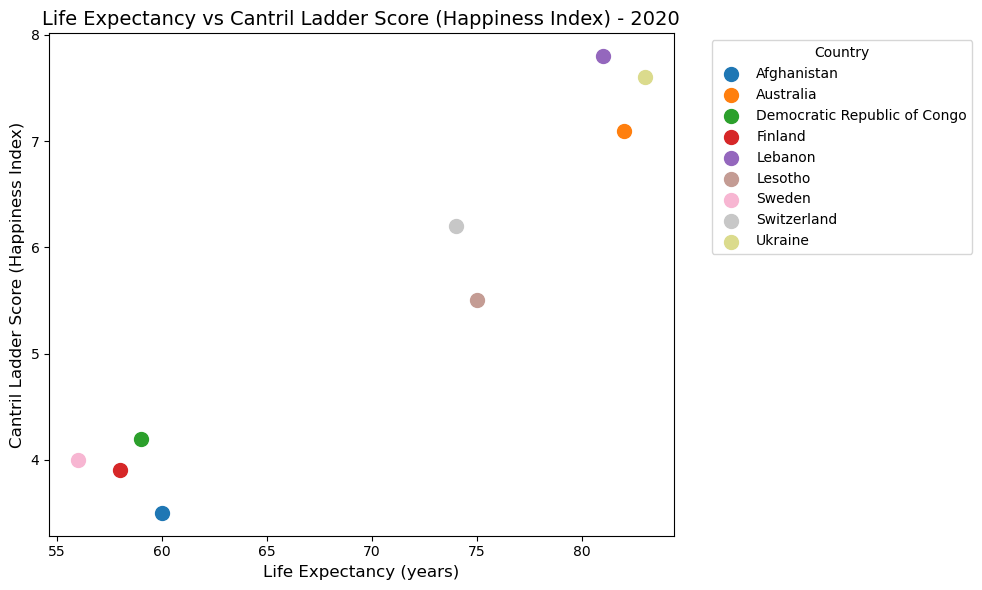

In [67]:
import matplotlib.pyplot as plt
import numpy as np


countries = ['Afghanistan', 'Australia', 'Democratic Republic of Congo', 
             'Finland', 'Lebanon', 'Lesotho','Sweden', 'Switzerland','Ukraine']
life_expectancy = [60, 82, 59, 58, 81, 75, 56, 74, 83, 84, 55, 73]
happiness_score = [3.5, 7.1, 4.2, 3.9, 7.8, 5.5, 4.0, 6.2, 7.6, 7.7, 3.3, 5.9]


from matplotlib import colormaps
cmap = colormaps.get_cmap('tab20') 
colors = [cmap(i / len(countries)) for i in range(len(countries))]


plt.figure(figsize=(10, 6))

for i, country in enumerate(countries):
    plt.scatter(life_expectancy[i], happiness_score[i], color=colors[i], label=country, s=100)


plt.title('Life Expectancy vs Cantril Ladder Score (Happiness Index) - 2020', fontsize=14)
plt.xlabel('Life Expectancy (years)', fontsize=12)
plt.ylabel('Cantril Ladder Score (Happiness Index)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

In diesem Grafik ist ersichtlich, dass bei den Ländern wie: Schweiz, Schweden und Australien es eine hohe Lebenserwartung und entsprechend hohe Cantril Ladder Scores gibt. Afghanistan dagegen hat eine niedriegere Lebenserwartung, nämlich 60 Jahre, und einen Cantril Ladder Score, der unter 4 liegt. Mögliche Gründe für diese Situation in Afghanistan sind: schlechte Gesundheitsvorsorge, Armut und Kriege. 


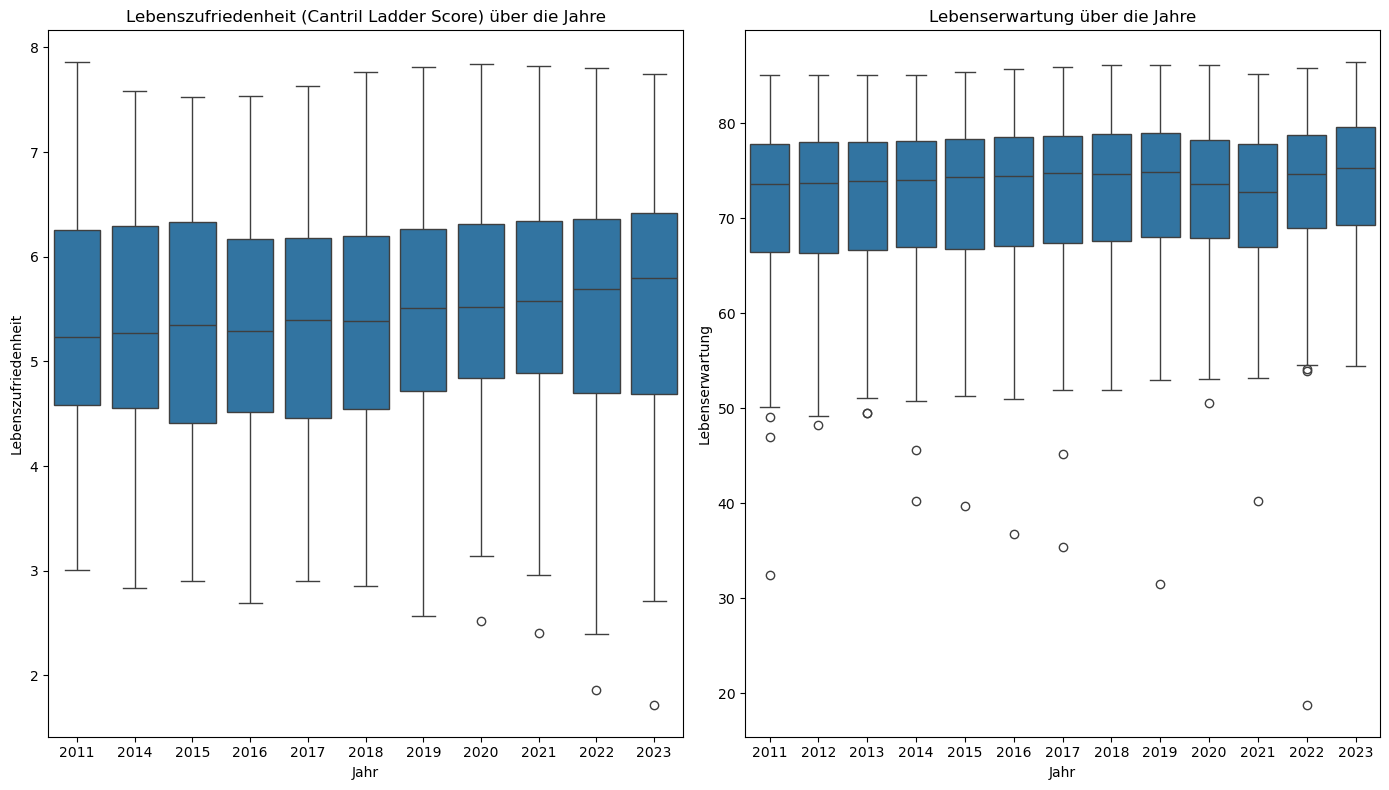

In [68]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Jahr', y='Cantril Ladder Score', data=df_filtered)
plt.title('Lebenszufriedenheit (Cantril Ladder Score) über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Lebenszufriedenheit')

df_clean = df.dropna(subset=['Life expectancy'])

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Year', y='Life expectancy', showfliers=True, whis=1.5)

plt.title('Lebenserwartung über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Lebenserwartung')

plt.tight_layout()
plt.show()


Oben sind zwei Grafiken dargestellt. 
Beim linken Grafik ist die Lebenszufriedenheit über die Jahre dargestelt. Dort ist ersichtilch, dass der Median immer konstant bleibt, nämlich bisschen mehr als 5. Die Spannweite ist aber breit, was auf grosse Streuungen zwischen den Ländern hindeutet. Es gibt auch Werte, bei der die Lebenszufriedenheit unter 3 liegt und sie gelten als Ausreisser.

Beim rechten Grafik ist die Lebenserwartung über die Jahre dargestellt. Dort bleibt der Median ebenfalls konstant, wobei die Länder, die eine hohe Lebenserwartung haben, oberhalb bleiben, und die Länder mit niedrigeren Lebenserwartung sind unter 50 Jahren dargestellt. Bei Länder, die Werte unter 50 Jahre zeigen, könnte es um eine Krankheit (Ebola) handeln oder Armut sowie Kriege.

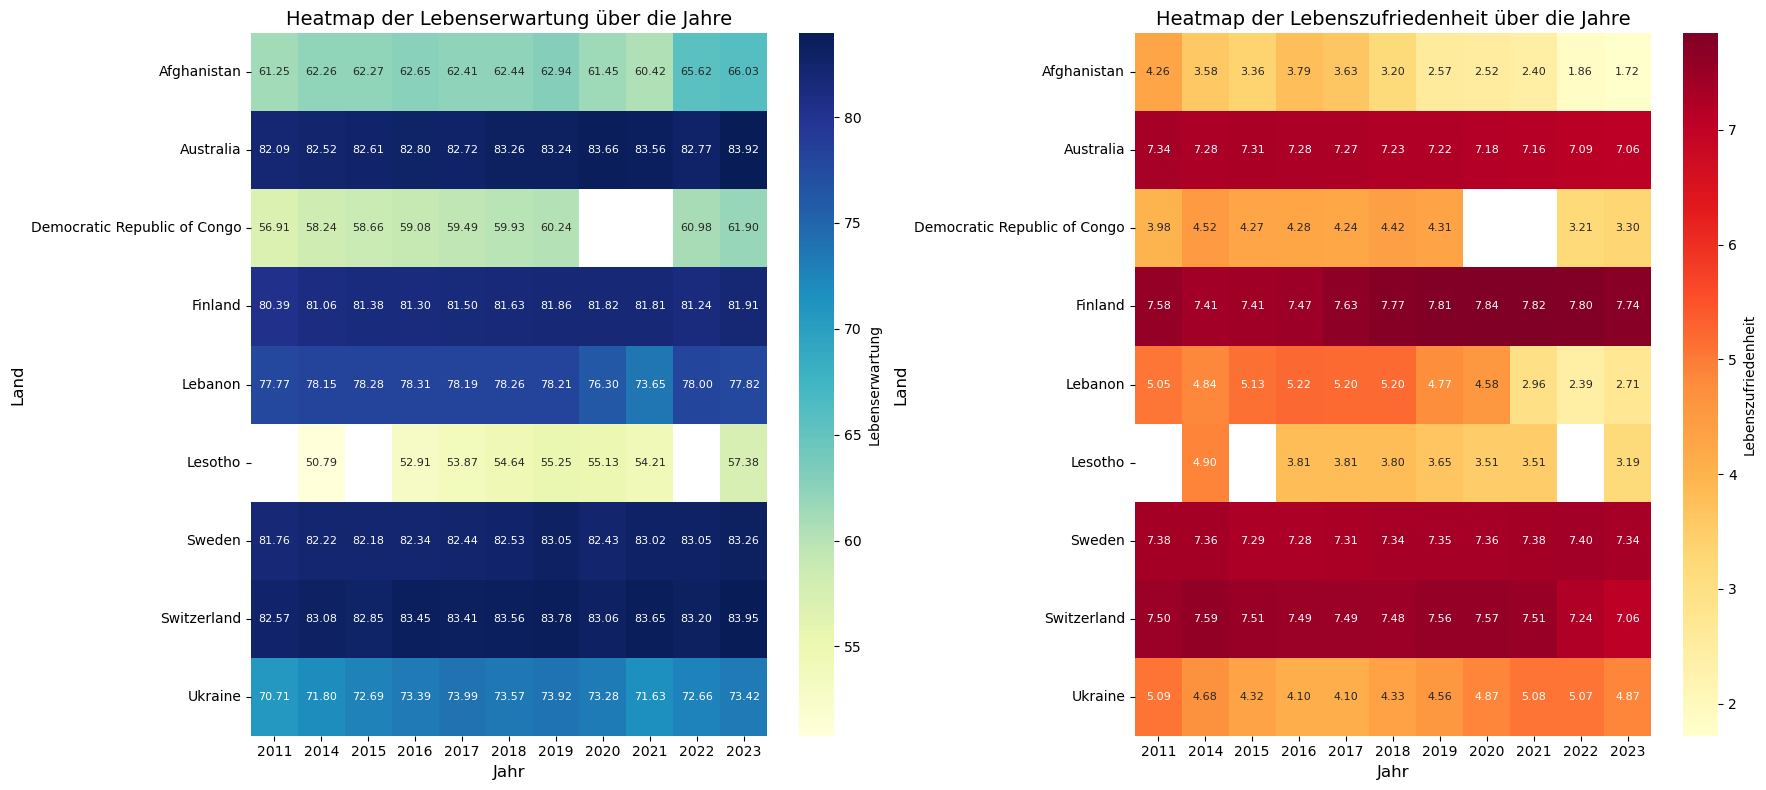

In [70]:
selected_countries = ['Switzerland', 'Sweden', 'Finland', 'Australia', 
                      'Afghanistan', 'Lebanon', 'Lesotho', 
                      'Democratic Republic of Congo', 'Ukraine']

df_filtered = df[df['Entity'].isin(selected_countries)]

df_filtered = df_filtered.dropna(subset=['Life expectancy', 'Cantril ladder score'])

df_pivot_life_expectancy = df_filtered.pivot_table(index='Entity', columns='Year', values='Life expectancy')

df_pivot_cantril_score = df_filtered.pivot_table(index='Entity', columns='Year', values='Cantril ladder score')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 Zeile, 2 Spalten

sns.heatmap(df_pivot_life_expectancy, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Lebenserwartung'}, 
            ax=axes[0], annot_kws={'size': 8})  # Schriftgröße anpassen
axes[0].set_title('Heatmap der Lebenserwartung über die Jahre', fontsize=14)
axes[0].set_xlabel('Jahr', fontsize=12)
axes[0].set_ylabel('Land', fontsize=12)

sns.heatmap(df_pivot_cantril_score, cmap='YlOrRd', annot=True, fmt='.2f', cbar_kws={'label': 'Lebenszufriedenheit'}, 
            ax=axes[1], annot_kws={'size': 8}) 
axes[1].set_title('Heatmap der Lebenszufriedenheit über die Jahre', fontsize=14)
axes[1].set_xlabel('Jahr', fontsize=12)
axes[1].set_ylabel('Land', fontsize=12)

plt.tight_layout()
plt.show()

Diese Grafik besteht aus zwei Heatmaps. 
Das linke Heatmap zeigt, dass die Lebenserwartung in der Schweiz, Schweden und Australien konstant bleibt, nämlich die Bevölkerung erreicht über 80 Jahre. 
Im Gegensatz zu diesen Ländern zeigen Afghanistan und die Demokratische Republik Kongo niedrigere Werte auf.
Das rechte Heatmap zeigt, dass die Länder mit einer höher Lebenszufriedenheit, meistens über 7, eine höhere Lebenserwatung zeigen. 
Die Lebenserwartung hängt aber nicht nur von der Lebenszufreidenheit. Zum Beispiel in Libanon waren Ereignisse wie Hafenexplosion, in Lesotho Krankheiten wie HIV und AIDS und in Afghanistan ständige Verschlechterung der Lage durch Kriege, Auseinandersetzungen, Armut und Menschenrechteverletgzungen. Dies hat die Lebenszufriedenheit sowie die Lebenserwartung verschlimmert.
Die Leute aus Demokratische Republik Kongo, hatten einen Anstieg an die Lebenserwartung, aber die Lebenszufriedenheit war immernoch niedrig, aufgrund von kontinuirliche Inhaftierungen oder die Verschmutzungen der Flüsse.
